# Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
PlayerInf = pd.read_csv("../data/player_info.csv")
#Games_plays = pd.read_csv("../data/game_plays.csv")

#Game_goalie_stats = pd.read_csv("../data/game_plays_players.csv")
Game_skater_stats = pd.read_csv("../data/game_skater_stats.csv")
Game = pd.read_csv("../data/game.csv")

### Players Statistics (detailed)

In [62]:
Player_stat_detailed = pd.merge(Game_skater_stats, Game, on='game_id')

In [63]:
Player_stat_detailed.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')

In [64]:
Player_stat_detailed = Player_stat_detailed.drop(['game_id', 'team_id', 'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz' ], axis=1)

In [65]:
Player_stat_detailed['count'] = 1

In [66]:
Player_stat_detailed.columns

Index(['player_id', 'timeOnIce', 'assists', 'goals', 'shots', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins',
       'faceoffTaken', 'takeaways', 'giveaways', 'shortHandedGoals',
       'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'season', 'count'],
      dtype='object')

In [67]:
grouped = Player_stat_detailed.groupby('player_id', as_index = False)

In [68]:
Player_stat_detailed = grouped.agg({'timeOnIce' : 'mean',
                                     'assists' : 'mean',
                                     'goals' : 'mean',
                                     'shots' : 'mean',
                                     'hits' : 'mean',
                                     'powerPlayGoals' : 'mean',
                                     'powerPlayAssists' : 'mean',
                                     'penaltyMinutes' : 'mean',
                                     'faceOffWins' : 'mean',
                                     'faceoffTaken' : 'mean',
                                     'takeaways' : 'mean',
                                     'giveaways' : 'mean',
                                     'shortHandedGoals' : 'mean',
                                     'shortHandedAssists' : 'mean',
                                     'blocked' : 'mean',
                                     'plusMinus' : 'sum',
                                     'evenTimeOnIce' : 'mean',
                                     'shortHandedTimeOnIce' : 'mean',
                                     'powerPlayTimeOnIce' : 'mean',
                                     'count' : 'sum'}, group_keys = True)

In [69]:
Player_stat_detailed = pd.merge(Player_stat_detailed, PlayerInf, on='player_id')
Player_stat_detailed.columns

Index(['player_id', 'timeOnIce', 'assists', 'goals', 'shots', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins',
       'faceoffTaken', 'takeaways', 'giveaways', 'shortHandedGoals',
       'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'count', 'firstName',
       'lastName', 'nationality', 'birthCity', 'primaryPosition', 'birthDate',
       'link'],
      dtype='object')

/Users/kirillbykov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


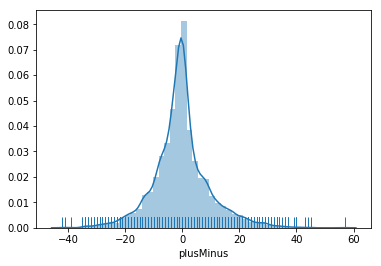

In [57]:
import seaborn as sns
%matplotlib inline

sns.distplot(Player_stat_detailed['plusMinus'], rug=True)

In [71]:
Player_stat_detailed[['goals','firstName',
       'lastName', 'nationality', 'birthCity', 'primaryPosition', 'birthDate',
       'link']].sort_values(by=['goals'])

,goals,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
790,0.000000,Joonas,Nattinen,FIN,Jamsa,C,1991-01-03,/api/v1/people/8475198
935,0.000000,Julian,Melchiori,CAN,Richmond Hill,D,1991-12-06,/api/v1/people/8475815
928,0.000000,Jarred,Tinordi,USA,Burnsville,D,1992-02-20,/api/v1/people/8475797
917,0.000000,Morgan,Ellis,CAN,Summerside,D,1992-04-30,/api/v1/people/8475782
914,0.000000,Petter,Granberg,SWE,Gallivare,D,1992-08-27,/api/v1/people/8475774
899,0.000000,Brett,Bulmer,CAN,Prince George,RW,1992-04-26,/api/v1/people/8475757
898,0.000000,John,McFarland,CAN,Richmond Hill,LW,1992-04-02,/api/v1/people/8475756
884,0.000000,Curtis,Hamilton,USA,Tacoma,LW,1991-12-04,/api/v1/people/8475734
882,0.000000,Danny,Biega,CAN,Montreal,D,1991-09-29,/api/v1/people/8475732
880,0.000000,Mark,Alt,USA,Kansas City,D,1991-10-18,/api/v1/people/8475729
